# Project data analysis - Velib Python

### Presentation of data

Description:

Load: rows = stations, columns = time stamp (each hour for a week 24*7=168)

Coord = rows: stations, columns = {Latitude, Longitude, bonus, name}

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

%matplotlib inline

In [2]:
load = pd.read_csv('data/velibLoading.csv', sep = " ")  # Reading data of the Velib loading
load.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [3]:
load.describe()

Lun-00       Lun-01       Lun-02       Lun-03       Lun-04  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.401503     0.408770     0.411718     0.415161     0.417136   
std       0.337079     0.335566     0.336132     0.337158     0.332237   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.093750     0.093023     0.096774     0.100000     0.108696   
50%       0.312500     0.333333     0.342857     0.350000     0.357143   
75%       0.694444     0.705882     0.708333     0.710526     0.700000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Lun-05       Lun-06       Lun-07       Lun-08       Lun-09  ...  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  ...   
mean      0.421650     0.419860     0.415729     0.384658     0.326331  ...   
std       0.326644     0.323422     0.319302     0.303621     0.314026  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.114286     0.114286     0.117647     0.114286     0.047619  ...   
50%       0.363636     0.360000     0.360000     0.320000     0.215385  ...   
75%       0.700000     0.700000     0.687500     0.636364     0.575000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

            Dim-14       Dim-15       Dim-16       Dim-17       Dim-18  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.346147     0.325526     0.311334     0.306399     0.314730   
std       0.340516     0.339897     0.336863     0.331194     0.322904   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.051282     0.041667     0.038462     0.043478     0.052632   
50%       0.204082     0.166667     0.151515     0.142857     0.172414   
75%       0.651163     0.608696     0.555556     0.550000     0.550000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Dim-19       Dim-20       Dim-21       Dim-22       Dim-23  
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  
mean      0.334080     0.353493     0.385975     0.392552     0.397529  
std       0.317279     0.317572     0.328448     0.335061     0.341536  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.071429     0.080000     0.095238     0.086957     0.090909  
50%       0.200000     0.238095     0.285714     0.292683     0.292683  
75%       0.558140     0.600000     0.666667     0.666667     0.692308  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 168 columns]

In [76]:
load.dtypes

Lun-00    float64
Lun-01    float64
Lun-02    float64
Lun-03    float64
Lun-04    float64
           ...   
Dim-19    float64
Dim-20    float64
Dim-21    float64
Dim-22    float64
Dim-23    float64
Length: 168, dtype: object

In [4]:
coord = pd.read_csv('data/velibCoord.csv', sep = " ") # Reading coordinates for each loading
coord.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

In [5]:
coord.dtypes
coord['longitude']

1       2.377389
2       2.317591
3       2.330447
4       2.271396
5       2.366897
          ...   
1185    2.360216
1186    2.316184
1187    2.314630
1188    2.439893
1189    2.331418
Name: longitude, Length: 1189, dtype: float64

In [6]:
coord.describe()

longitude     latitude        bonus
count  1189.000000  1189.000000  1189.000000
mean      2.342512    48.859207     0.106812
std       0.044825     0.023597     0.309005
min       2.222189    48.806380     0.000000
25%       2.310820    48.841249     0.000000
50%       2.343574    48.859403     0.000000
75%       2.374277    48.877520     0.000000
max       2.479464    48.915199     1.000000

In [7]:
print(f'Shape of "load": {load.shape}')
number_of_missing_values_load = load.isna().sum().sum()
number_of_duplicate_values_load = load.duplicated().sum() 
print(f'Number of missing values "load": {number_of_missing_values_load}')
print(f'Number of duplicate values "load": {number_of_duplicate_values_load}\n')

print(f'Shape of "coord": {coord.shape}')
number_of_missing_values_coord = coord.isna().sum().sum()
number_of_duplicate_values_coord = coord.duplicated().sum() 
print(f'Missing values "coord": {number_of_missing_values_coord}')
print(f'Number of duplicate values "coord": {number_of_missing_values_coord}')

Shape of "load": (1189, 168)
Number of missing values "load": 0
Number of duplicate values "load": 0

Shape of "coord": (1189, 4)
Missing values "coord": 0
Number of duplicate values "coord": 0


## Decriptive part

In [8]:
station_names = coord.names.value_counts().sort_values(ascending=False)
indexes = np.argwhere(station_names.values>1).flatten()
print(station_names[indexes])
print(f'\nNumber of stations with multiple occurances in coord: {len(station_names.index[indexes])}')

 PORTE DES LILAS          3
 GARE D'AUSTERLITZ        3
 SAINT MARCEL             2
 GARE DE L'EST            2
 CHERCHE MIDI             2
 LACEPEDE                 2
 FAURE (AUBERVILLIERS)    2
 RICHARD LENOIR           2
 BASTILLE                 2
 SAINT HONORE             2
 BROCHANT                 2
 SAINT AUGUSTIN           2
 JOURDAIN                 2
 DODU                     2
 PORT ROYAL               2
 AQUEDUC                  2
 PARC DE BELLEVILLE       2
 ALEXANDRE DUMAS          2
 PORTE DE SAINT OUEN      2
 BOURSE DU TRAVAIL        2
 PORTE DE BAGNOLET        2
 WILSON (LEVALLOIS)       2
 LEGENDRE                 2
 BELLEVILLE               2
 FRANCE (LEVALLOIS)       2
 CLICHY                   2
Name: names, dtype: int64

Number of stations with multiple occurances in coord: 26


In [9]:
name_checkup = np.array([' PORTE DES LILAS', ' CLICHY'])
# name_checkup = station_names.index[indexes]
# multiple_stat = coord['names'].isin(station_names.index[indexes])
multiple_stat = coord['names'].isin(name_checkup)
stat_rel = coord[multiple_stat]
print(stat_rel)



     longitude   latitude  bonus             names
29    2.328807  48.884127      0            CLICHY
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
500   2.326207  48.883318      0            CLICHY
957   2.411046  48.878099      1   PORTE DES LILAS


In [10]:

import plotly.express as px

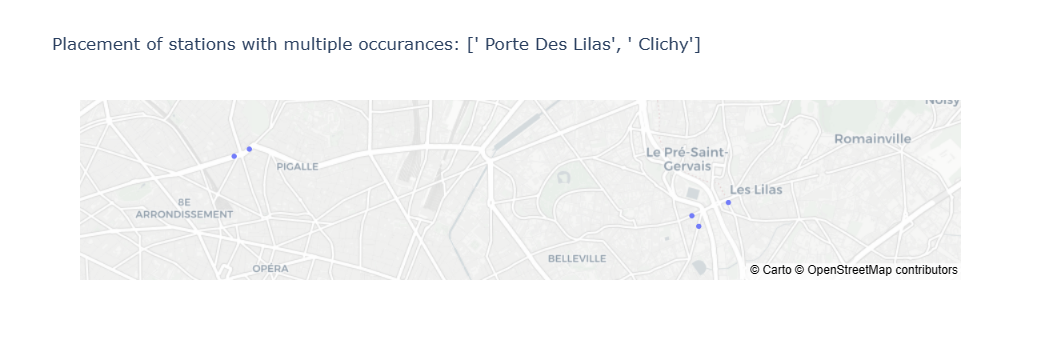

In [11]:
fig = px.scatter_mapbox(stat_rel, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = "carto-positron",
                        # color = np.arange(0,len(name_checkup), 1), 
                        # color_discrete_sequence  = px.colors.sequential.Plasma_r, #size = load_per_hour,
                        zoom  = 12, opacity = .9,
                        title = f'Placement of stations with multiple occurances: {[elem.title() for elem in name_checkup]}')

fig.show()

Looking at two different stations with multiple occurences, we can see that they are really close geographically. We can suppose that the velib there are often used. Let's take a look at the loading of the station Porte des lilas .

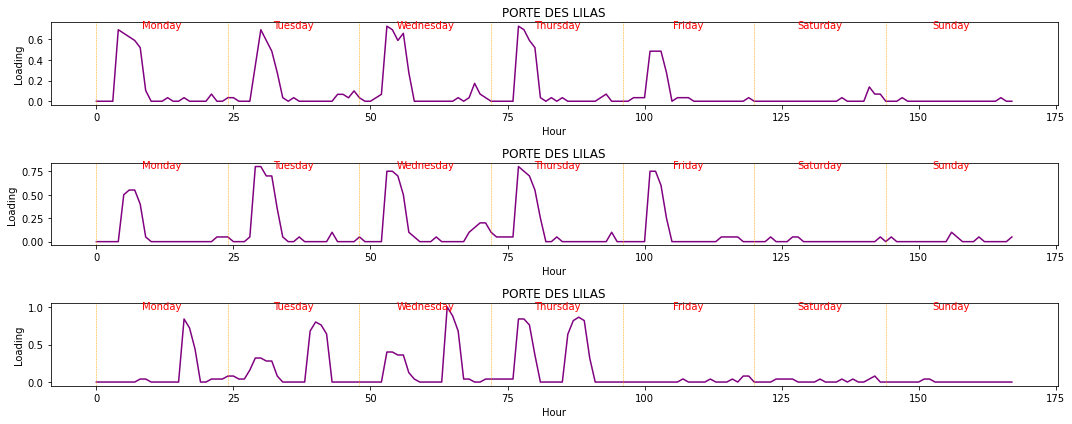

In [56]:

time_range = np.arange(0, 168, 1)
ind = coord.index[coord['names'] == " PORTE DES LILAS"]

fig, axs = plt.subplots(len(ind), 1, figsize=(15, 6))

for i in range(len(ind)):
    axs[i].plot(time_range, load.iloc[ind[i]-1], color='purple')
    axs[i].set_title('PORTE DES LILAS')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Loading')
    
    for j, day in enumerate(days):
        axs[i].axvline(j * 24, color='orange', linestyle='--', linewidth=0.5)
        axs[i].text(j * 24 + 12, axs[i].get_ylim()[1] * 0.9, day, ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()

Indeed, we can clearly see that the loading of those station are often near 0. It moves a lot so we can imagine that the velib are put there the morning and directly used by the inhabitants to go to work. We can explain that there is only one time in the day where the loading is high by the fact that this station is on a hill. We can suppose that the people are using the velib to go down to work and then take the public transport to go back up. Let's take a look at the loading of the station Clichy which is not on a hill.


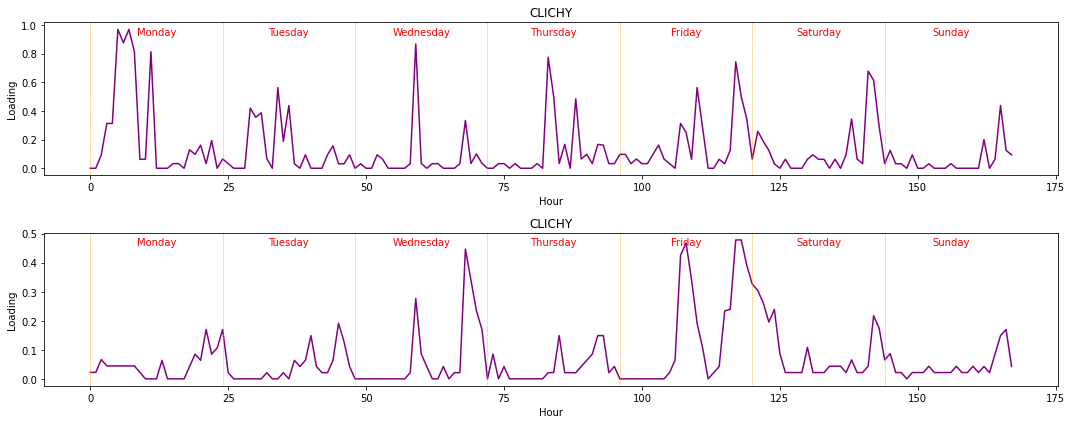

In [78]:

time_range = np.arange(0, 168, 1)
ind1 = coord.index[coord['names'] == " CLICHY"]

fig, axs = plt.subplots(len(ind1), 1, figsize=(15, 6))

for i in range(len(ind1)):
    axs[i].plot(time_range, load.iloc[ind1[i]-1], color='purple')
    axs[i].set_title('CLICHY')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Loading')
    
    for j, day in enumerate(days):
        axs[i].axvline(j * 24, color='orange', linestyle='--', linewidth=0.5)
        axs[i].text(j * 24 + 12, axs[i].get_ylim()[1] * 0.9, day, ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()

It is really more difficult to interpret the loading of this station.

In [65]:
print('--- Average loading ---')
mean = load.mean(axis=1) # Average per station
tot_mean = mean.mean()
print(f'{tot_mean:.4f}')

# --- #
print(" ")
print('--- Least loaded station, on average ---')
print(f' {coord.loc[mean.idxmin()]} with {mean.min():.4f}')

# --- 
print('')

print('--- Fullest loaded station, on average ---')
print(f' {coord.loc[mean.idxmax()]} with {mean.max():.4f}')

#---

print('--- Average loading of station CLICHY ---')

print((mean[ind1[0]] + mean [ind1[1]])/2)


--- Average loading ---
0.3816
 
--- Least loaded station, on average ---
 longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object with 0.0161

--- Fullest loaded station, on average ---
 longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object with 0.9194
--- Average loading of station CLICHY ---
0.09970552786978733


The average loading of the stations Clichy is clearly lower than the average loading of all the stations. The velib there are then often used. It explains the fact that there is two stations at the same place there. However, we can see that the station Hornet (Bagnolet) is often empty but is not part of the station with multiple occurrences. It would maybe be useful to add one more. On the other hand, some stations are not that useful. Indeed, the station Insurrection aout 1944 (Ivry) is almost full at every hour of the day, with an average loading of almost 92%. Let's take a closer look.

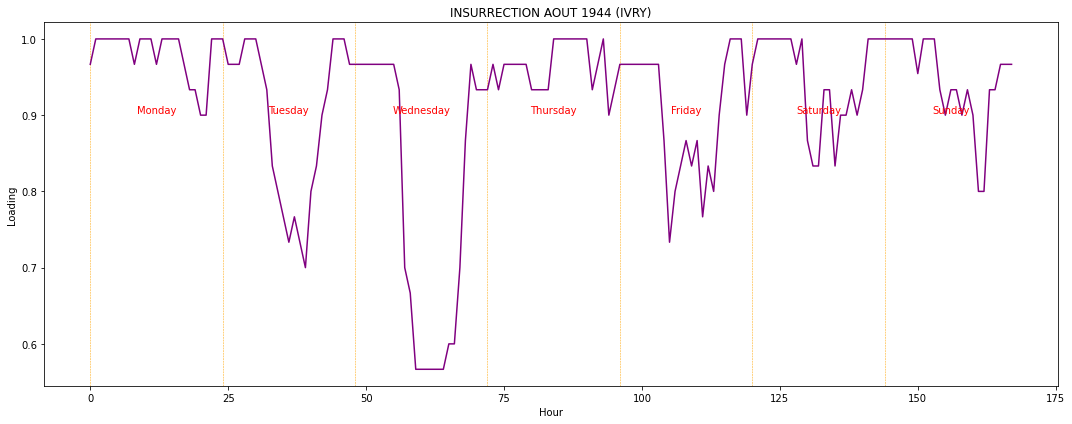

In [86]:

ind3 = coord.index[coord['names'] == " INSURRECTION AOUT 1944 (IVRY)"]

fig, ax = plt.subplots(figsize=(15, 6))


for j, day in enumerate(days):
    ax.axvline(j * 24, color='orange', linestyle='--', linewidth=0.5)
    ax.text(j * 24 + 12, ax.get_ylim()[1] * 0.9, day, ha='center', va='bottom', color='red')
    
ax.plot(time_range, load.iloc[ind3-1].squeeze(), color='purple')  

ax.set_title('INSURRECTION AOUT 1944 (IVRY)')
ax.set_xlabel('Hour')
ax.set_ylabel('Loading')
plt.tight_layout()
plt.show()

We can now see that the lower loading is almost of 57% on wednesday but it is hard to explain why. Except that day, it does not go under 70%. Let's now take a look at the entire data frame.

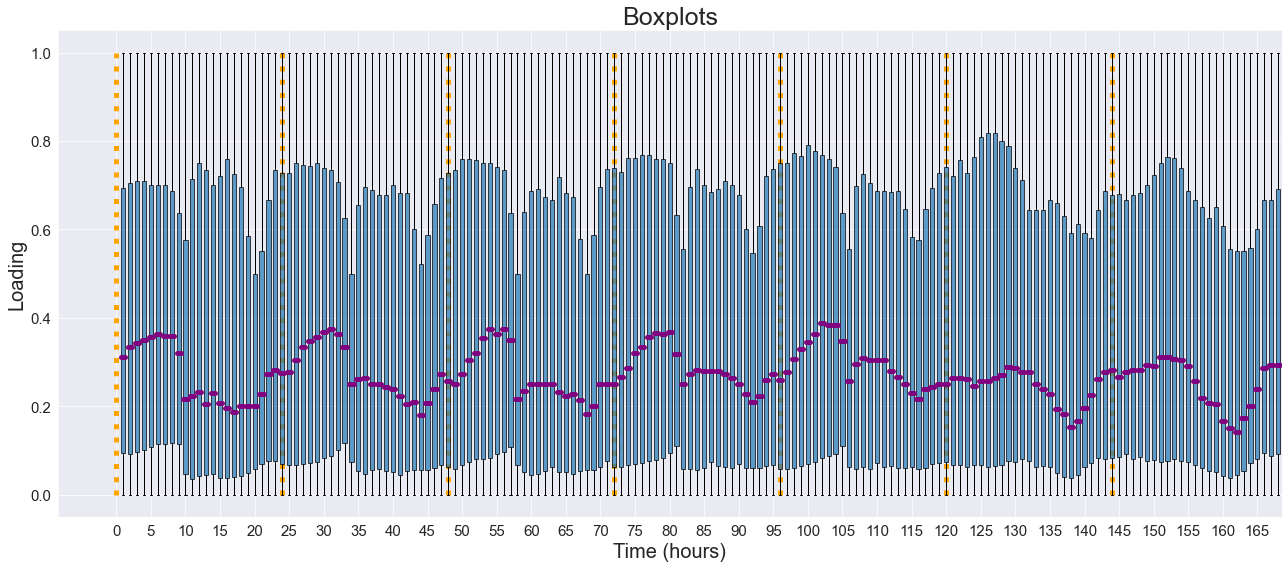

In [22]:
plt.figure(figsize = (18,8))

load_data = load.to_numpy()
bp = plt.boxplot(load_data, widths = 0.6, patch_artist = True)

for box in bp['boxes']:
    box.set_alpha(0.7)
    
for median in bp['medians']:
    median.set(color = "Purple", linewidth=5)
    
# --- #
    
plt.vlines(x = time_tick, ymin = 0, ymax = 1, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

# --- #

plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

We can see that the behavior of stations loading is similar every weekday.The median load rate remains between 20% and 40%, so we can deduce that there is an imbalance in the use of the various stations.

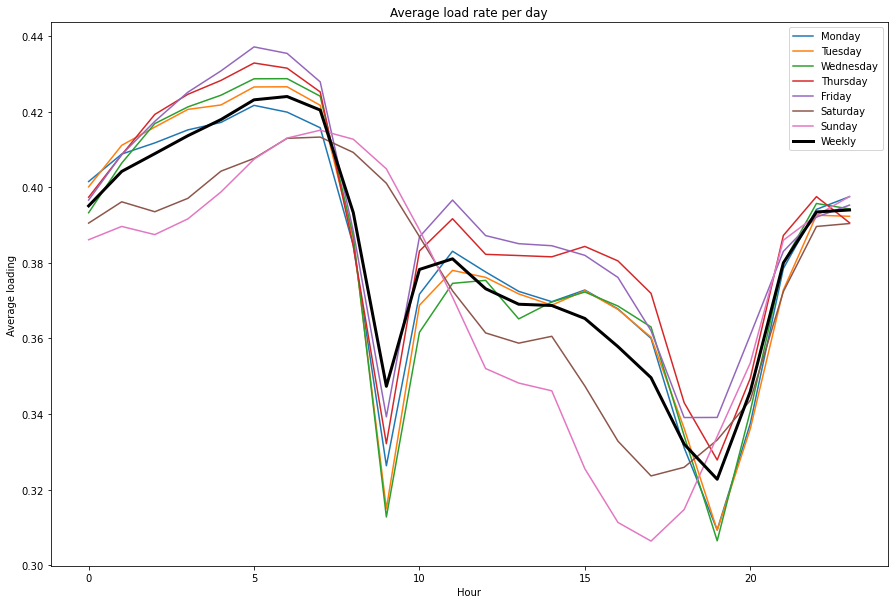

In [89]:
mean_per_hour_per_day = load.mean().to_numpy()
mean_per_hour = mean_per_hour_per_day.reshape((7,24))

time_range = np.linspace(0, 24,1)

plt.figure(figsize = (15,10))
plt.title("Average load rate per day")
plt.plot(mean_per_hour.transpose())
plt.plot(mean_per_hour.mean(axis=0), color = "black", linewidth = 3)
#plt.plot(time, np.full_like(station_nr, tot_mean, dtype=np.double))
plt.xlabel("Hour")
plt.ylabel("Average loading")
plt.legend(days + ['Weekly'])
plt.show()

For the weekdays, we can clearly see that the average loading evolves more or less in the same way. The stations are fuller in the morning, then people probably goes to work by bike between 8am and 10am. Many stations must have a really low loading rate at 8pm. In the weekend, the average loading is the lowest around 6pm. The velib are, in average, more used.


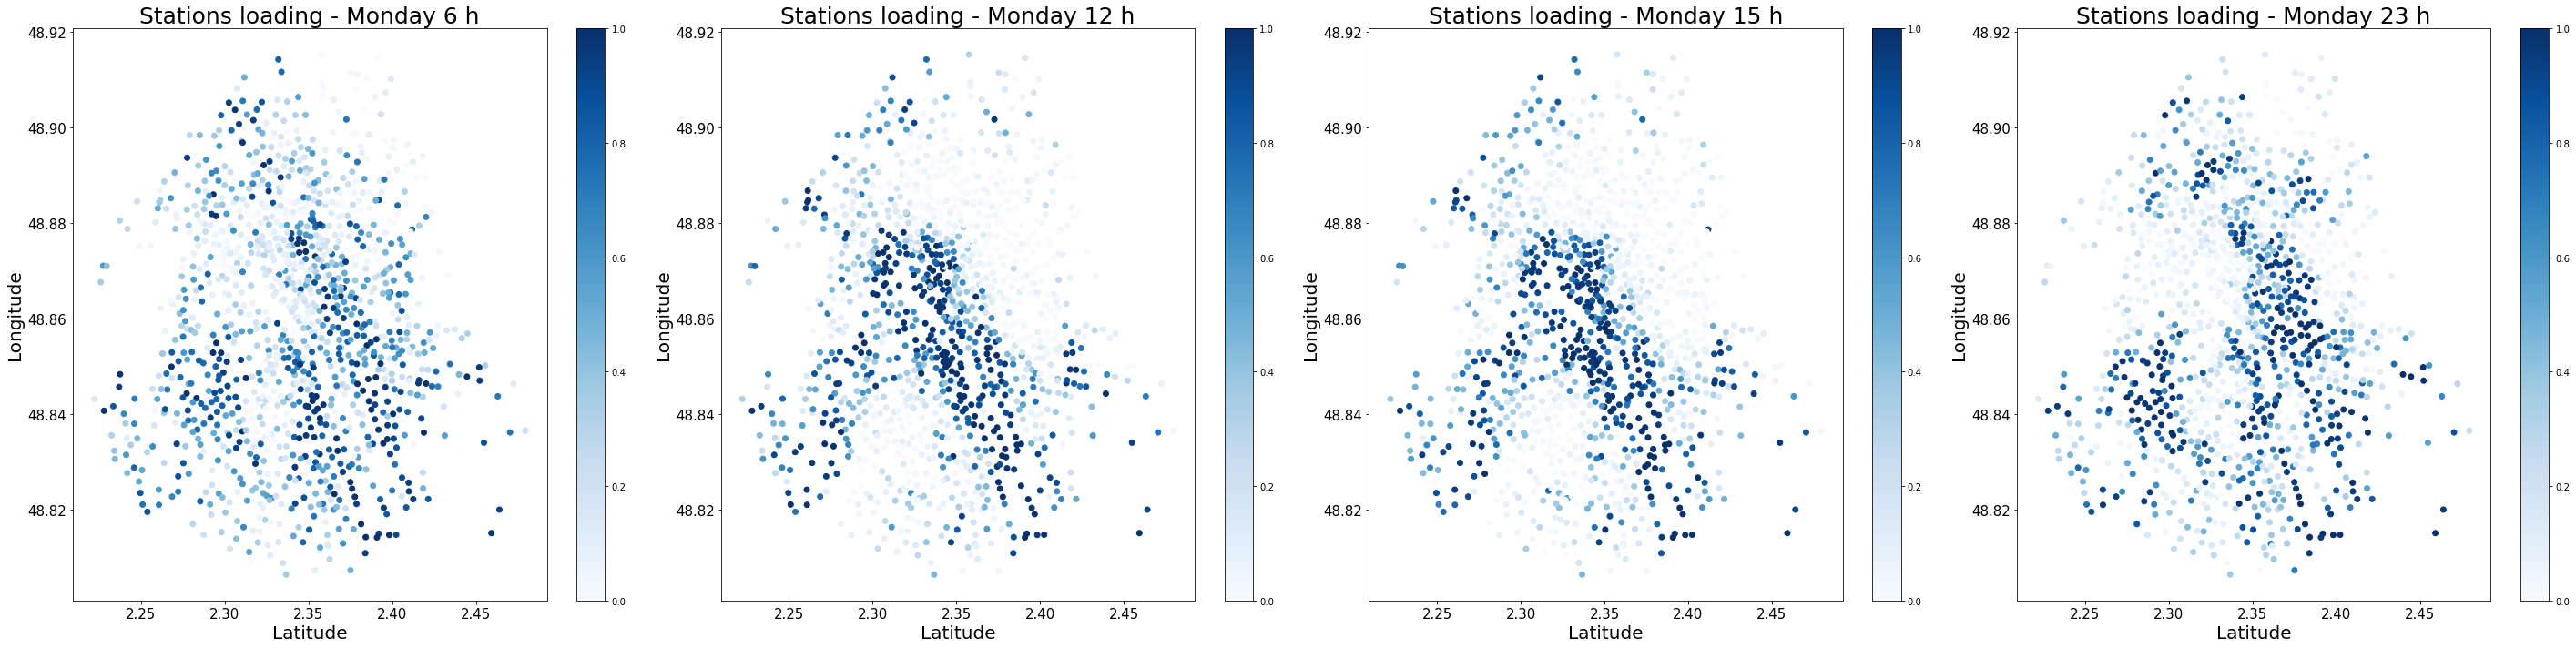

In [142]:
hours = [6, 12, 15,23]

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px

s, n = 10, len(hours)
fig, axs = plt.subplots(1,n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.longitude, coord.latitude, c = load.iloc[:,h], cmap = cm.Blues)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

We can see that early in the morning et late in the evening, the stations the busiest stations are all around Paris center. However, during the day, they are all along the Seine. We can imagine that people are taking velib to go to work and go back home. Moreover, when we took a look at the map of the cycle paths of Paris, we can see that most of them are along the Seine. We can suppose that people prefer to ride a bike on a cycle path and then leave the bike when the path stops to finish their routes by walk or public transport.


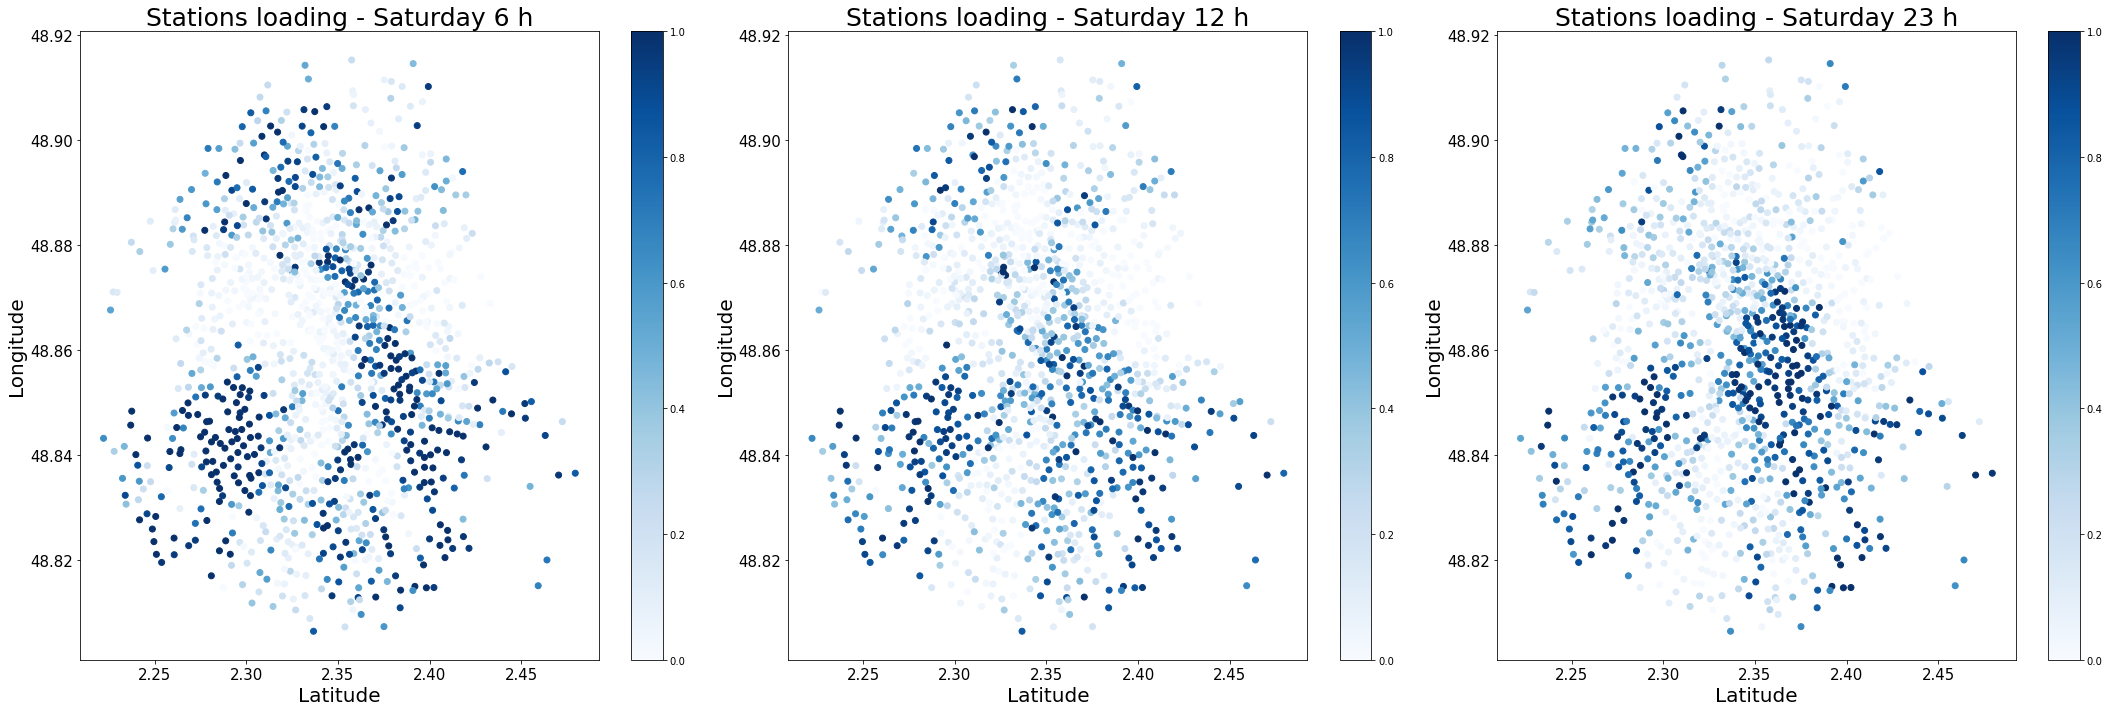

In [147]:
hours = [126,132,143]

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px

s, n = 10, len(hours)
fig, axs = plt.subplots(1,n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.longitude, coord.latitude, c = load.iloc[:,h], cmap = cm.Blues)
    axs[i].set_title('Stations loading - Saturday {} h'.format(h-5*24), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()


For the weekend, here the saturday, we can see that the velibs are globally more used. However, we can imagine that people are not going far from their place because the busiest stations stay the same more or less throughout the day. The stations are even busier at 6am, we can deduce that people are not going outside that early in the weekend.


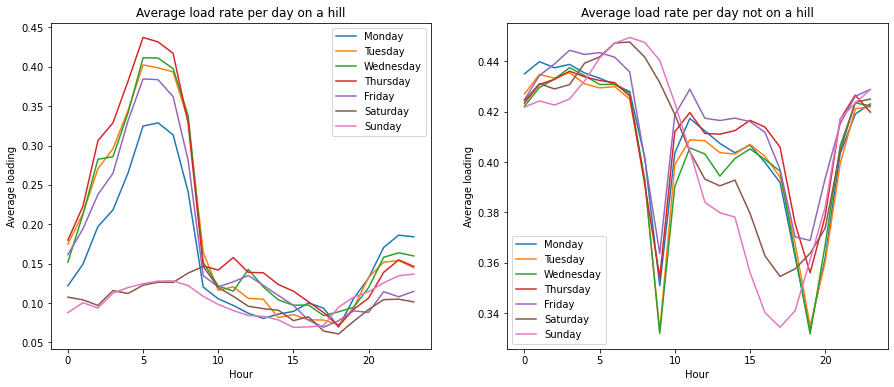

In [162]:
Hill = load[coord['bonus'] == 1]
NoHill = load[coord['bonus'] == 0]

HillH = Hill.mean().to_numpy()
HillHo = HillH.reshape((7,24))

time_range = np.linspace(0, 24,1)
plt.figure(figsize=(15, 6))


plt.subplot(1,2, 1)
plt.title("Average load rate per day on a hill")
plt.plot(HillHo.transpose())
plt.xlabel("Hour")
plt.ylabel("Average loading")
plt.legend(days)

HourNoHill = NoHill.mean().to_numpy()
HourNoHill = HourNoHill.reshape((7,24))

plt.subplot(1,2, 2)
plt.title("Average load rate per day not on a hill")
plt.plot(HourNoHill.transpose())
plt.xlabel("Hour")
plt.ylabel("Average loading")
plt.legend(days)
plt.show()

When we compare the stations that are located on a hill and those that are not on a hill, we can see a clear difference of the loading. During the weekdays, the loading of the stations of a hill is really low (between 0 et 20 %). People must use the bikes to go down to work and take the public transports to go back up, as we said earlier. During the weekend, those stations are always almost empty. However, for the stations that are not on a hill, the average loading per hour is higher (between 30 et 50%) and stays always in same range. 

## PCA

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
load_scaled = ss.fit_transform(load)

pca = PCA()
load_pca = pca.fit_transform(load_scaled) 
# load_pca = pca.fit_transform(load)

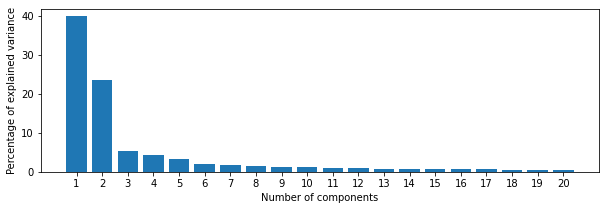

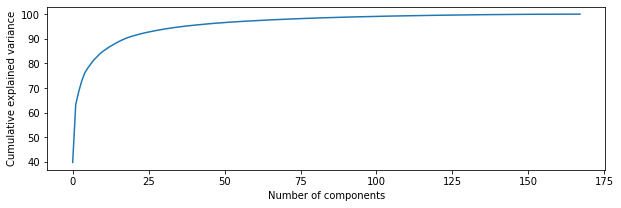

Variance explained by the first 5 components: 76.22


In [164]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.figure(figsize = (10, 3))
n_bars = 20
x_ticks = np.arange(1, n_bars + 1, 1)
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars])
plt.xlabel("Number of components")
plt.xticks(x_ticks)
plt.ylabel("Percentage of explained variance")
# plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 3))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
# plt.tight_layout()
plt.show()
n_components = 5
print(f"Variance explained by the first {n_components} components:", round(sum([explained_variance_ratio[i] for i in range(n_components)]),2))

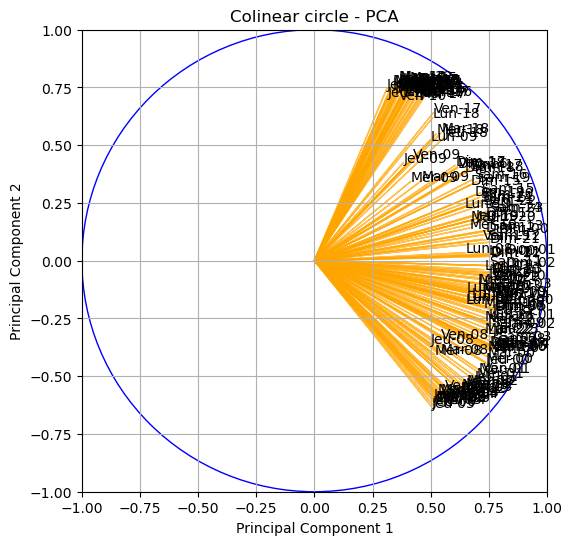

In [272]:
# Collinear circle
comp1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
comp2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(comp1, comp2, load.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'orange', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'blue', fill = False))

plt.title('Colinear circle - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

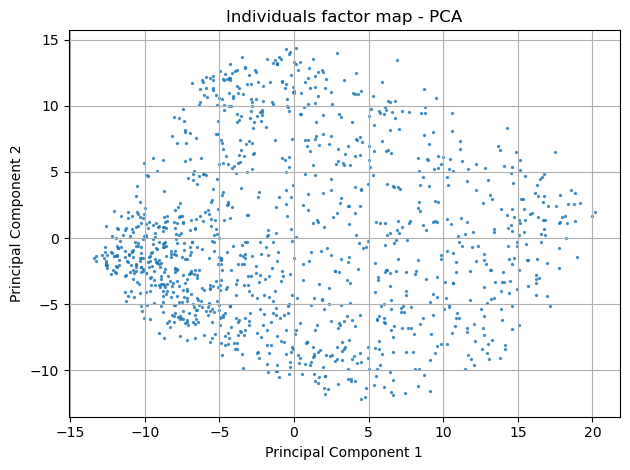

In [281]:
plt.figure()
plt.scatter(load_pca[:, 0], load_pca[:, 1], s=2, linewidths=1, alpha=0.7)

plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.tight_layout()
plt.show()